In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import mglearn
from sklearn import metrics

pd.set_option('display.max_columns', 140) #最大表示列数の指定
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()
train.shape

test.head()
test.shape

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0


(11900, 13)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,3873,17,Local-gov,132652,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
1,3625,23,Private,132652,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,United-States
2,3028,19,Private,132652,11th,7,Never-married,Handlers-cleaners,Own-child,White,Female,United-States
3,13814,30,State-gov,132652,HS-grad,9,Never-married,Protective-serv,Unmarried,Black,Female,United-States
4,15398,60,Private,132652,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


(5100, 12)

In [4]:
train_line = train.shape[0]
train_line

11900

In [5]:
y = train[['Y']]
y.shape

(11900, 1)

In [6]:

all_df = pd.concat((train.loc[:, 'age':'native-country'], test.loc[:, 'age':]))
# all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
#                       test.loc[:,'MSSubClass':'SaleCondition']))
all_df.head()
all_df.shape

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States
1,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States
2,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
3,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States
4,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


(17000, 11)

# fnlwgt変数削除

In [7]:
all_df.drop('fnlwgt', axis=1, inplace=True)

# ?をNoneに変更

In [8]:
all_df.loc[all_df['workclass'] == '?', 'workclass'] = 'None'
all_df.loc[all_df['occupation'] == '?', 'occupation'] = 'None'

In [9]:
all_df['workclass'].unique()
all_df['occupation'].unique()

array(['Private', 'State-gov', 'None', 'Local-gov', 'Federal-gov',
       'Self-emp-inc', 'Self-emp-not-inc'], dtype=object)

array(['Adm-clerical', 'Prof-specialty', 'Craft-repair',
       'Protective-serv', 'Exec-managerial', 'None', 'Sales',
       'Handlers-cleaners', 'Tech-support', 'Machine-op-inspct',
       'Other-service', 'Farming-fishing', 'Transport-moving'],
      dtype=object)

# One-Hotエンコーディング

In [10]:
dummie_df = pd.get_dummies(all_df, drop_first=True)

In [11]:
dummie_df.head()

,age,education-num,workclass_Local-gov,workclass_None,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_None,occupation_Other-service,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_White,sex_Male,native-country_Philippines,native-country_United-States
0,21,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,29,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,19,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,17,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
4,47,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


# データの正規化

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(dummie_df)
scaled_df

array([[-0.73044823, -0.17642523, -0.22756305, ..., -1.42035009,
        -0.02169815,  0.04976653],
       [ 0.11126024, -0.62669228, -0.22756305, ..., -1.42035009,
        -0.02169815,  0.04976653],
       [-0.94087535,  1.17437594, -0.22756305, ..., -1.42035009,
        -0.02169815,  0.04976653],
       ...,
       [ 0.84775516, -2.42776051, -0.22756305, ...,  0.70405177,
        -0.02169815,  0.04976653],
       [ 0.53211448,  0.27384183, -0.22756305, ...,  0.70405177,
        -0.02169815,  0.04976653],
       [ 0.84775516,  1.17437594,  4.39438656, ...,  0.70405177,
        -0.02169815,  0.04976653]])

# 訓練データテストデータ分割

In [13]:
train_data = scaled_df[:train_line]
test_data = scaled_df[train_line:]

In [14]:
train_data.shape
test_data.shape

(11900, 47)

(5100, 47)

# モデル構築
# 1.ロジスティック回帰
## 1.1 ロジスティック回帰　クロスバリデーション

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3 ,random_state=123)
LR = LogisticRegression()

# 交差検証
score_LR = cross_val_score(LR, train_data, y, cv=5)
#各分割におけるスコア
print('Cross-Validation scores:{}'.format(score_LR))

# スコアの平均
print('Average Score:{}'.format(np.mean(score_LR)))

# 学習

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

LR = LogisticRegression()
fit_LR = LR.fit(x_train, y_train)

score_LR = LR.score(x_test, y_test)
print('Test set score: {}'.format(score_LR))

Cross-Validation scores:[0.83529412 0.83361345 0.83571429 0.83109244 0.84243697]
Average Score:0.8356302521008404


In [20]:
LR_pred = LR.predict(test_data)
LR_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# 2.LightGBM

In [21]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import pprint, pydotplus



In [22]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=0)

In [23]:

# LightGBMの初期化
model_lgb = lgb.LGBMClassifier(silent=False)

# パラメータを設定
param_grid = {"max_depth": [10, 25, 50, 75],
                                "learning_rate":[0.001, 0.01, 0.05, 0.1],
                                 "num_leaves":[100,300,900,1200],
                                 "n_estimators":[100,200,500]
                            }

# パラメータチューニングをグリッドサーチで行うために設定する
## このGridSearchCVには注意が必要 score はそのスコアを基準にして最適化する
grid_result = GridSearchCV(estimator = model_lgb,
                                                          param_grid = param_grid,
                                                          scoring = 'balanced_accuracy',
                                                          cv = skf,
                                                          verbose = 3,
                                                          return_train_score = True,
                                                          n_jobs = -1)

grid_result.fit(train_data, y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  3.7min finished


[LightGBM] [Info] Number of positive: 3048, number of negative: 8852
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 11900, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256134 -> initscore=-1.066158
[LightGBM] [Info] Start training from score -1.066158


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMClassifier(silent=False), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [10, 25, 50, 75],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [100, 300, 900, 1200]},
             return_train_score=True, scoring='balanced_accuracy', verbose=3)

In [24]:
# ベストな分類器を抽出
pprint.pprint(grid_result.best_estimator_)
print('-'*100)
# ベストなパラメータを抽出
pprint.pprint(grid_result.best_params_)
print('-'*100)
# ベストな正解率を抽出
pprint.pprint(grid_result.best_score_)

LGBMClassifier(learning_rate=0.01, max_depth=50, n_estimators=500,
               num_leaves=100, silent=False)
----------------------------------------------------------------------------------------------------
{'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 500, 'num_leaves': 100}
----------------------------------------------------------------------------------------------------
0.7753146508914831


In [25]:
# データセット登録
lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [26]:
params_lgb = {
                                'task': 'train',                                # タスクを訓練に設定
                                'boosting_type': 'gbdt',           # GBDTを指定
                                'objective': 'binary',                  # 2クラス分類を指定
                                'metric': 'auc',     
#                                 'num_class': 2,                           # クラスの数
                                'learning_rate': 0.01,                  # 学習率
                                'max_depth': 50,
                                'n_estimators': 500,                 # 予測器(決定木)の数:イタレーション
                                'num_leaves': 100,                     # ノードの数
#                                 'num_iteration':100,
                                'verbosity': -1                                # Fatal の場合出力
}

In [27]:
lgb_results = {}
model_lgb = lgb.train(
                            params=params_lgb,
                            train_set=lgb_train,
                             valid_sets=[lgb_train,lgb_test],
                             valid_names=['Train', 'Test'],
                            verbose_eval=50,  # 50イテレーション毎に学習結果出力
                            num_boost_round=1000,             # 最大イテレーション回数指定
                            early_stopping_rounds=100,         # アーリーストッピング設定
                             evals_result=lgb_results
                     )

Training until validation scores don't improve for 100 rounds
[50]	Train's auc: 0.912559	Test's auc: 0.893881
[100]	Train's auc: 0.916806	Test's auc: 0.895205
[150]	Train's auc: 0.919722	Test's auc: 0.895931
[200]	Train's auc: 0.922777	Test's auc: 0.896675
[250]	Train's auc: 0.925601	Test's auc: 0.896383
Early stopping, best iteration is:
[193]	Train's auc: 0.922437	Test's auc: 0.896851


# 結果を抽出する

In [28]:
# loss_train = lgb_results['Train']['multi_logloss']      # 訓練誤差
# loss_test = lgb_results['Test']['multi_logloss']          # 汎化誤差
best_iteration = model_lgb.best_iteration                  # 最良の予測器が得られたイタレーション数
print(best_iteration)

193


Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'logloss')

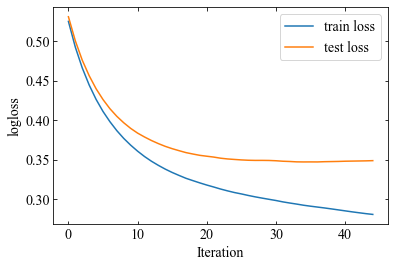

In [106]:
# # グラフの描画
# # フォントの種類とサイズ設定
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'Times New Roman'

# # メモリを内側にする
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

# # グラフの入れ物を用意する
# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# # グラフの上下左右にメモリ線をつける
# ax1.yaxis.set_ticks_position('both')
# ax1.xaxis.set_ticks_position('both')

# # 軸のラベルを設定する
# ax1.set_xlabel('Iteration')
# ax1.set_ylabel('logloss')

# # データプロット
# ax1.plot(loss_train, label='train loss')
# ax1.plot(loss_test, label='test loss')

# # グラフ表示
# plt.legend()
# plt.show()
# plt.close()

In [29]:
lgb_pred = model_lgb.predict(x_test, num_iteration=model_lgb.best_iteration)
lgb_pred

array([0.0553675 , 0.09124728, 0.13778523, ..., 0.03828501, 0.69318275,
       0.04225893])

In [30]:
fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8968508677826161


In [31]:

lgb_pred_05 = np.where(lgb_pred >= 0.5, 1, 0)
lgb_pred_06 = np.where(lgb_pred >= 0.6, 1, 0)
lgb_pred_07 = np.where(lgb_pred >= 0.7, 1, 0)
lgb_pred_08 = np.where(lgb_pred >= 0.8, 1, 0)
lgb_pred_09 = np.where(lgb_pred >= 0.9, 1, 0)
lgb_pred_04 = np.where(lgb_pred >= 0.4, 1, 0)
lgb_pred_03 = np.where(lgb_pred >= 0.3, 1, 0)
lgb_pred_02 = np.where(lgb_pred >= 0.2, 1, 0)
lgb_pred_01 = np.where(lgb_pred >= 0.1, 1, 0)


In [32]:
fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_01)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_02)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_03)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_04)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_05)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_06)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_07)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_08)
auc = metrics.auc(fpr, tpr)
print(auc)

fpr, tpr, threshholds = metrics.roc_curve(y_test, lgb_pred_09)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7734965194965088
0.814045500517563
0.8115843648096477
0.7908863485758933
0.7492678602199346
0.7064269900592711
0.6250247116361825
0.563419370075324
0.5


In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lgb_pred_04)

0.8322128851540617

In [34]:
y_test.sum()
lgb_pred_04.sum()

Y    923
dtype: int64

978

In [35]:
lgb_pred = model_lgb.predict(test_data, num_iteration=model_lgb.best_iteration)
lgb_pred

array([0.61771791, 0.31559285, 0.03840361, ..., 0.2407483 , 0.07514441,
       0.56093898])

In [36]:
LGB_pred = np.where(lgb_pred >= 0.4, 1, 0)
LGB_pred
LGB_pred.sum()

array([1, 0, 0, ..., 0, 0, 1])

1393

# ランダムフォレスト
グリッドサーチでチューニング

In [37]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

In [38]:
search_params = {
     'n_estimators'      : [5, 10, 50, 100, 300],
      'max_features'      : [5, 10, 20],
      'random_state'      : [2525],
      'n_jobs'            : [1],
      'min_samples_split' : [5, 10, 50, 100],
      'max_depth'         : [1,3,5, 10, 50, 100]
}

clf_result = GridSearchCV(RandomForestClassifier(),           # 対象の機械学習モデル
                  search_params,   # 探索パラメタ辞書
                  cv=skf,            # クロスバリデーションの分割数
                  verbose=3,    # ログ表示
                  n_jobs=-1)       # 並列処理

clf_result.fit(train_data, y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 50, 100],
                         'max_features': [5, 10, 20],
                         'min_samples_split': [5, 10, 50, 100],
                         'n_estimators': [5, 10, 50, 100, 300], 'n_jobs': [1],
                         'random_state': [2525]},
             verbose=3)

In [39]:
# ベストな分類器を抽出
pprint.pprint(clf_result.best_estimator_)
print('-'*100)
# ベストなパラメータを抽出
pprint.pprint(clf_result.best_params_)
print('-'*100)
# ベストな正解率を抽出
pprint.pprint(clf_result.best_score_)

RandomForestClassifier(max_depth=50, max_features=5, min_samples_split=100,
                       n_estimators=300, n_jobs=1, random_state=2525)
----------------------------------------------------------------------------------------------------
{'max_depth': 50,
 'max_features': 5,
 'min_samples_split': 100,
 'n_estimators': 300,
 'n_jobs': 1,
 'random_state': 2525}
----------------------------------------------------------------------------------------------------
0.842436974789916


In [40]:
RF = RandomForestClassifier(max_depth=50, max_features=5, min_samples_split=100, n_estimators=300, n_jobs=-1, random_state=2525)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features=5, min_samples_split=100,
                       n_estimators=300, n_jobs=-1, random_state=2525)

In [41]:
rf_pred = RF.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
accuracy_score(rf_pred, y_test)

0.8397759103641457

In [43]:
# 変数の重要度を可視化
importance = pd.DataFrame({ '変数' :dummie_df.columns, '重要度' :RF.feature_importances_})
importance.head(10)

,変数,重要度
0,age,0.145392
1,education-num,0.108508
2,workclass_Local-gov,0.003240
3,workclass_None,0.004218
4,workclass_Private,0.003995
5,workclass_Self-emp-inc,0.007673
6,workclass_Self-emp-not-inc,0.002869
7,workclass_State-gov,0.001911
8,education_11th,0.001635
9,education_12th,0.000509


In [44]:
RF_pred = RF.predict(test_data)
rf_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [45]:
all_pred = np.concatenate(LR_pred, LGB_pred, RF_pred)
all_pred

TypeError: only integer scalar arrays can be converted to a scalar index

In [46]:
len(LR_pred)
len(LGB_pred)
len(RF_pred)

5100

5100

5100

In [90]:
LR_pred_df = pd.DataFrame(LR_pred)
LGB_pred_df = pd.DataFrame(LGB_pred)
RF_pred_df = pd.DataFrame(RF_pred)


In [91]:
all_pred = pd.concat([LR_pred_df, LGB_pred_df, RF_pred_df], axis=1)

In [92]:
all_pred.columns = ['LR_pred','LGB_pred','RF_pred']
all_pred.head()

,LR_pred,LGB_pred,RF_pred
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,1


In [93]:
all_pred['ans'] = all_pred['LR_pred'] + all_pred['LGB_pred'] + all_pred['RF_pred']
all_pred.head()
all_pred['LR_pred'].sum() + all_pred['LGB_pred'].sum() + all_pred['RF_pred'].sum()
all_pred['ans'].sum()

,LR_pred,LGB_pred,RF_pred,ans
0,1,1,1,3
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,3


3687

3687

In [94]:
all_pred.loc[all_pred['ans'] < 2, 'ans'] = 0
all_pred.loc[all_pred['ans'] >= 2, 'ans'] = 1
all_pred


,LR_pred,LGB_pred,RF_pred,ans
0,1,1,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
5095,0,0,0,0
5096,0,0,0,0
5097,0,0,0,0
5098,0,0,0,0


In [114]:
submit_01 = all_pred.drop(['LR_pred', 'LGB_pred', 'RF_pred'], axis=1)

submit_01

,ans
0,1
1,0
2,0
3,0
4,1
...,...
5095,0
5096,0
5097,0
5098,0


In [111]:
test_index = test[['index']]

In [115]:
submit_01 = pd.concat([test_index, submit_01],axis=1)
submit_01.head()

,index,ans
0,3873,1
1,3625,0
2,3028,0
3,13814,0
4,15398,1


In [116]:
submit_01.to_csv('../output/submit_01.csv', index=False, header=False)

1